# Exploratory data analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams
from PIL import Image
import numpy as np
import collections
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import rcParams

In [4]:
df_dialogos=pd.read_csv("dialogos_cleaned.csv")
df_preguntas=pd.read_csv("preguntas_cleaned.csv")

In [5]:
def quitar_stopwords(texto):
  texto_limpio=[]
  stop_words=set(stopwords.words("spanish"))
  palabras=word_tokenize(texto)
  for palabra in palabras:
    if palabra not in stop_words and palabra.isalpha():
      texto_limpio.append(palabra.lower())
  return texto_limpio

In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
dialogos=" ".join(df_dialogos["Dialogo"])
dialogos=quitar_stopwords(dialogos)
dialogos_texto=" ".join([palabra for palabra in dialogos])
preguntas=" ".join(df_preguntas["Pregunta"])
preguntas=quitar_stopwords(preguntas)
preguntas_texto=" ".join([palabra for palabra in preguntas])
respuestas=" ".join(df_preguntas["Respuesta"])
respuestas=quitar_stopwords(respuestas)
respuestas_texto=" ".join([palabra for palabra in respuestas])

In [8]:
def wordclouds(imagen,texto,titulo):
  mask=np.array(Image.open(f"/content/{imagen}"))
  wc = WordCloud(stopwords=STOPWORDS,font_path="/content/lm.otf",
                mask=mask, background_color="white", width=20,height=10,
                max_words=2000, max_font_size=256,
                random_state=13, colormap='RdYlGn')
  wc.generate(texto)
  plt.imshow(wc, interpolation="bilinear")
  plt.axis('off')
  plt.title(titulo)
  plt.figure(figsize=(2, 2))
  plt.show()
  print("\n")

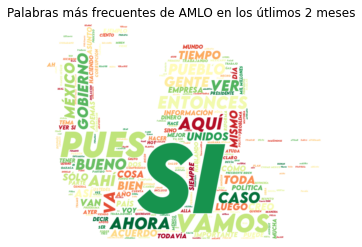

<Figure size 144x144 with 0 Axes>

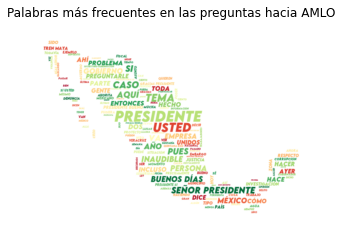

<Figure size 144x144 with 0 Axes>

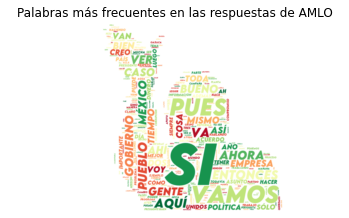

<Figure size 144x144 with 0 Axes>

In [9]:
wordclouds("a.jpg",dialogos_texto,"Palabras más frecuentes de AMLO en los útlimos 2 meses")
wordclouds("mx.jpg",preguntas_texto,"Palabras más frecuentes en las preguntas hacia AMLO")
wordclouds("am.jpg",respuestas_texto,"Palabras más frecuentes en las respuestas de AMLO")

In [10]:
def palabras_top(texto,contexto):
  palabras=[]
  frecuencia=[]
  contar_palabras=collections.Counter(texto)
  for palabra, conteo in contar_palabras.most_common(20):
    palabras.append(palabra)
    frecuencia.append(conteo)
  colors = cm.rainbow(np.linspace(0, 1, 10))
  rcParams['figure.figsize'] = 20, 10
  plt.title(f'Top 20 {contexto}')
  plt.xlabel('Frecuencia')
  plt.ylabel('Palabras')
  plt.barh(palabras, frecuencia, color=colors)
  ax = plt.gca()
  ax.invert_yaxis()
  plt.show()
  print("\n")

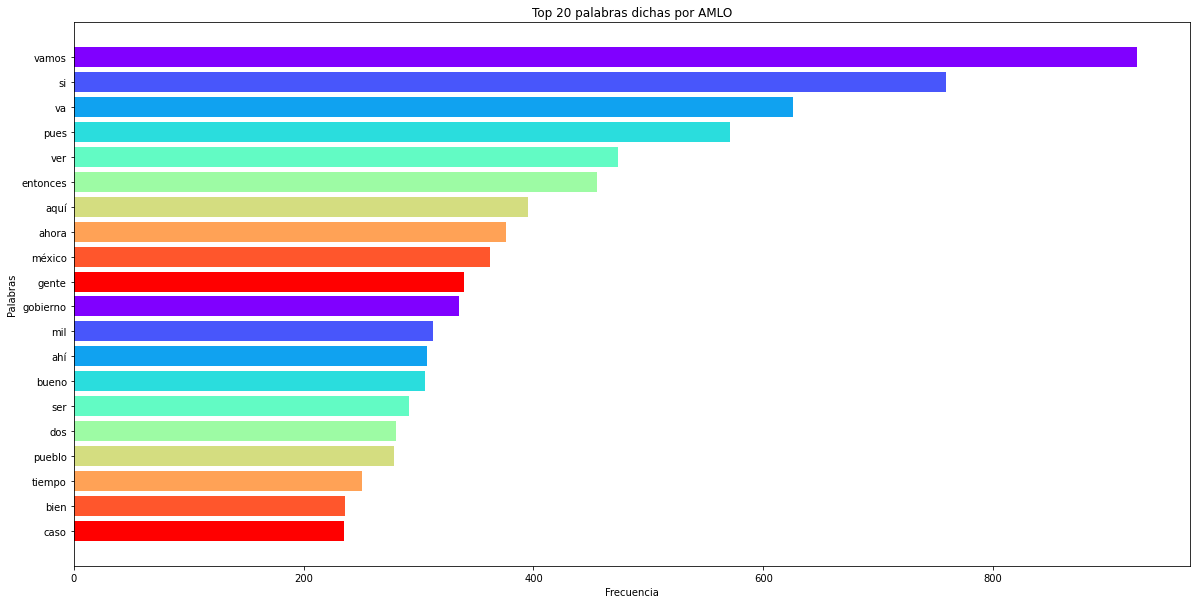

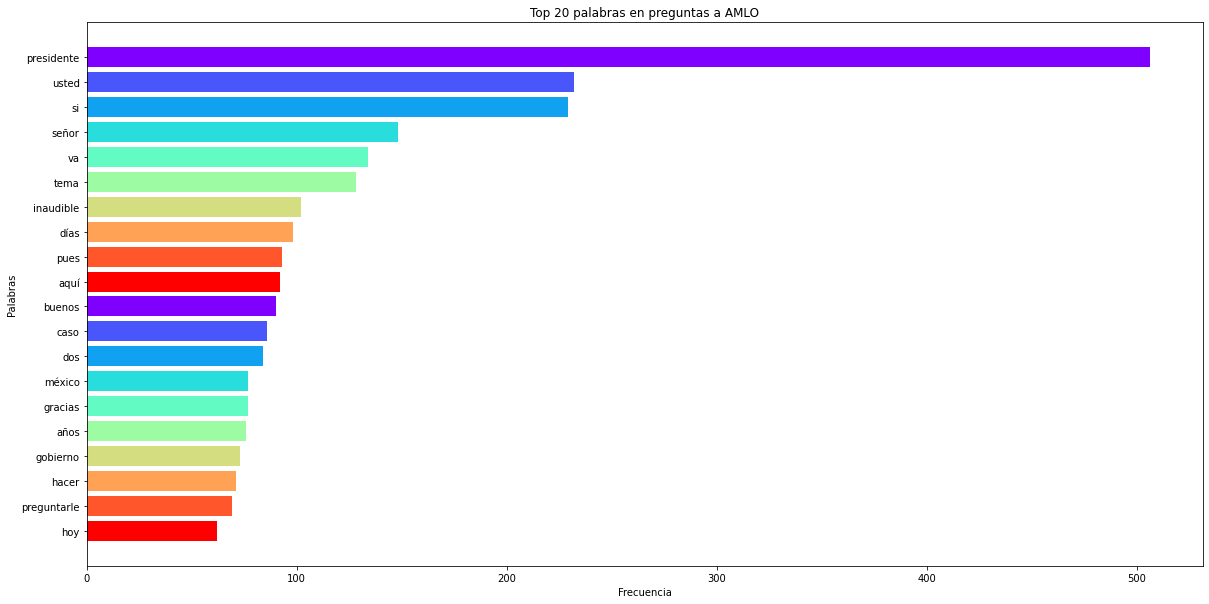

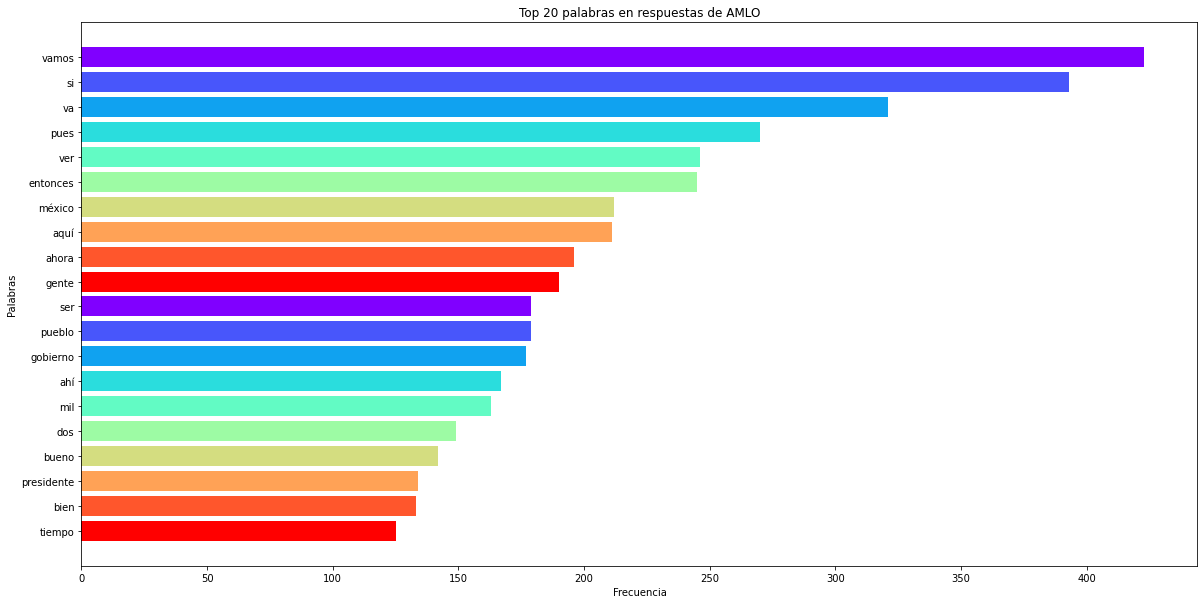

In [11]:
palabras_top(dialogos,"palabras dichas por AMLO")
palabras_top(preguntas,"palabras en preguntas a AMLO")
palabras_top(respuestas,"palabras en respuestas de AMLO")

Observation: We can see the president use a lot of words for future events like "vamos", "va", "tiempo", but also use words for the present like "aquí", "ahora" and comunicate the current situation like a good one with "bueno", "bien". The questions seems to be very polite and goes with the objective of questioning the actions taken about recurrent topics and cases. Whereas the answers are very afirmative and about future actions, equally about people's current perception.

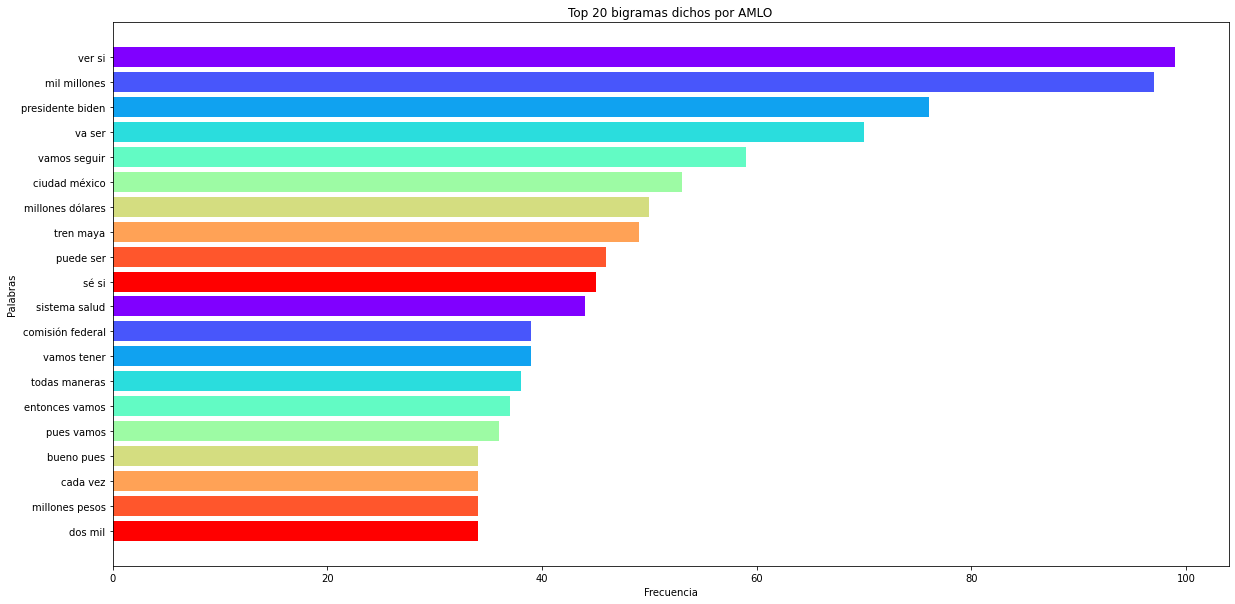

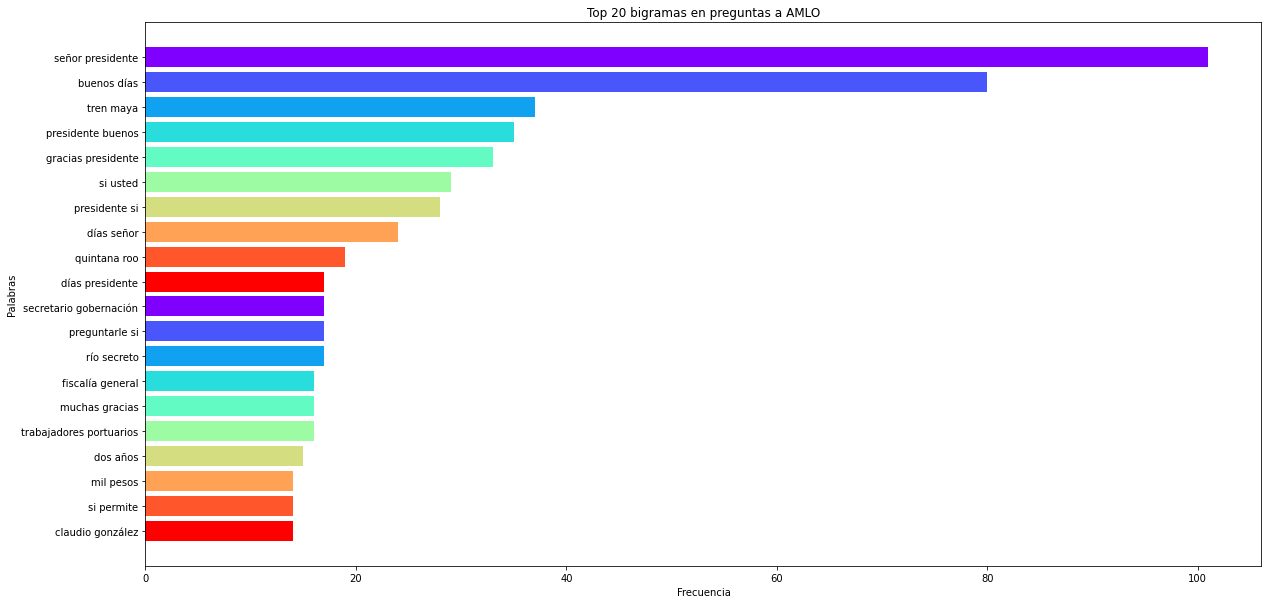

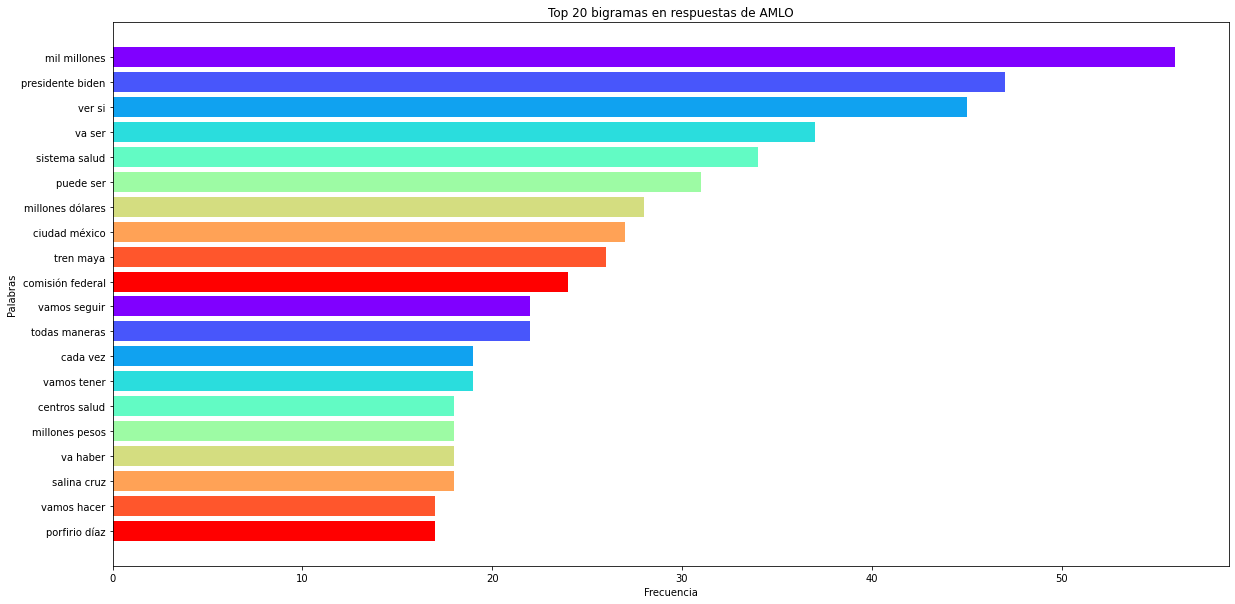

In [12]:
dialogos_bi=list(ngrams(dialogos_texto.split(),2))
dialogos_bi=[bigrama[0] +" " +bigrama[1] for bigrama in dialogos_bi]
preguntas_bi=list(ngrams(preguntas_texto.split(),2))
preguntas_bi=[bigrama[0]+" "+bigrama[1] for bigrama in preguntas_bi]
respuestas_bi=list(ngrams(respuestas_texto.split(),2))
respuestas_bi=[bigrama[0]+" "+bigrama[1] for bigrama in respuestas_bi]
palabras_top(dialogos_bi,"bigramas dichos por AMLO")
palabras_top(preguntas_bi,"bigramas en preguntas a AMLO")
palabras_top(respuestas_bi,"bigramas en respuestas de AMLO")

Observations: With bigrams is easier to see the current topics, we can see the president talks a lot about money, USA's president, the goverment's current actions and projects, and dependencies. The wuestions are about president's projects, safety, Quintana Roo and goverment's secretary. Whereas answers are about sanitary system, invertion, the maya train, and the FCE.

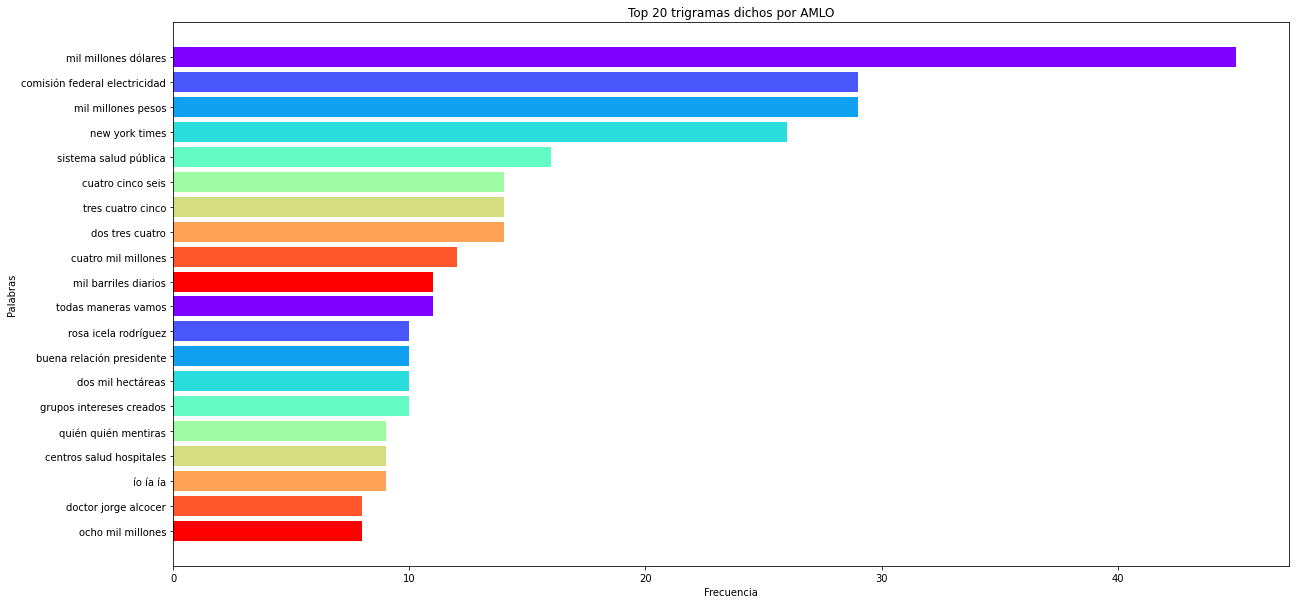

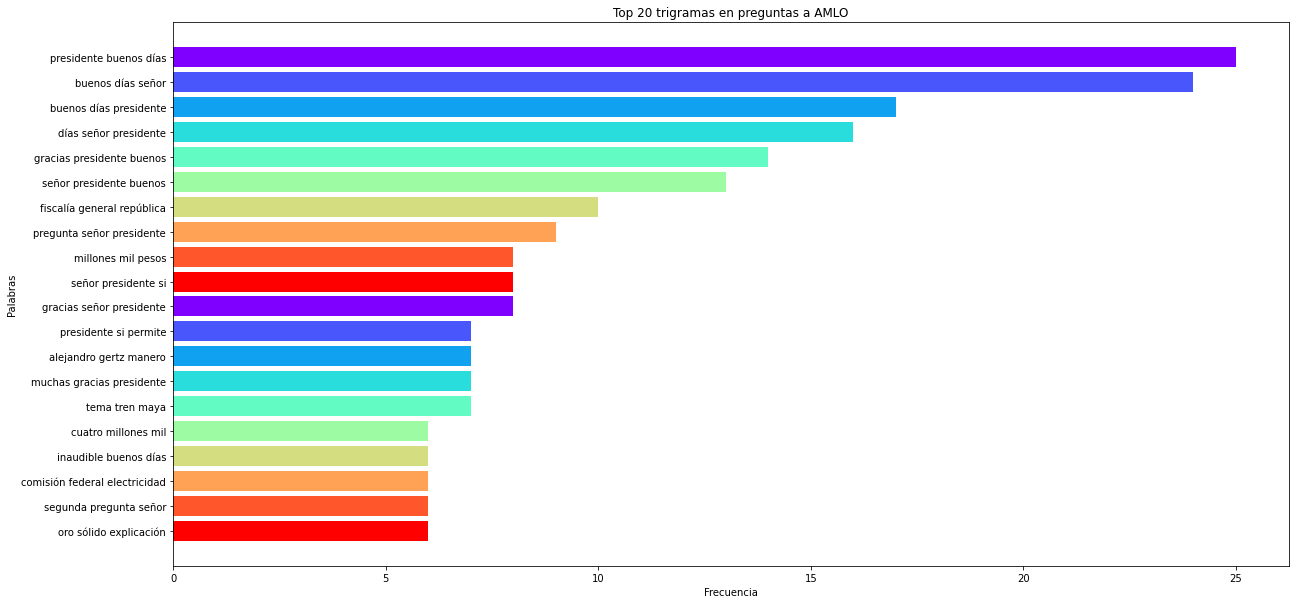

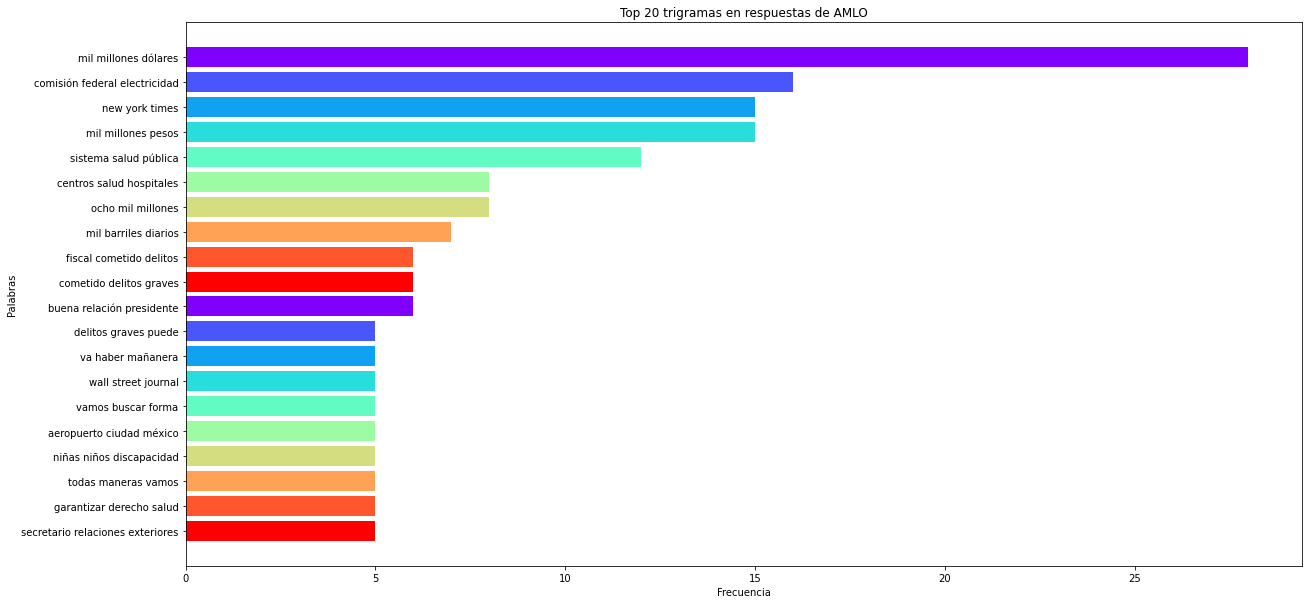

In [13]:
dialogos_tri=list(ngrams(dialogos_texto.split(),3))
dialogos_tri=[trigrama[0] +" " +trigrama[1]+" "+trigrama[2] for trigrama in dialogos_tri]
preguntas_tri=list(ngrams(preguntas_texto.split(),3))
preguntas_tri=[trigrama[0]+" "+trigrama[1]+" "+trigrama[2] for trigrama in preguntas_tri]
respuestas_tri=list(ngrams(respuestas_texto.split(),3))
respuestas_tri=[trigrama[0]+" "+trigrama[1]+" "+trigrama[2] for trigrama in respuestas_tri]
palabras_top(dialogos_tri,"trigramas dichos por AMLO")
palabras_top(preguntas_tri,"trigramas en preguntas a AMLO")
palabras_top(respuestas_tri,"trigramas en respuestas de AMLO")

Observations: While trigrams have low occurence, we can see the president still talk about invertions and sanitary system, but also about members of his gabinet, the New York Times newsletter, oil barrels and oppositors. The questions are about safety, electrical energy, goverment's projects and members and money. Whereas answers are about electricity comision, money, crimes and asnitary system.

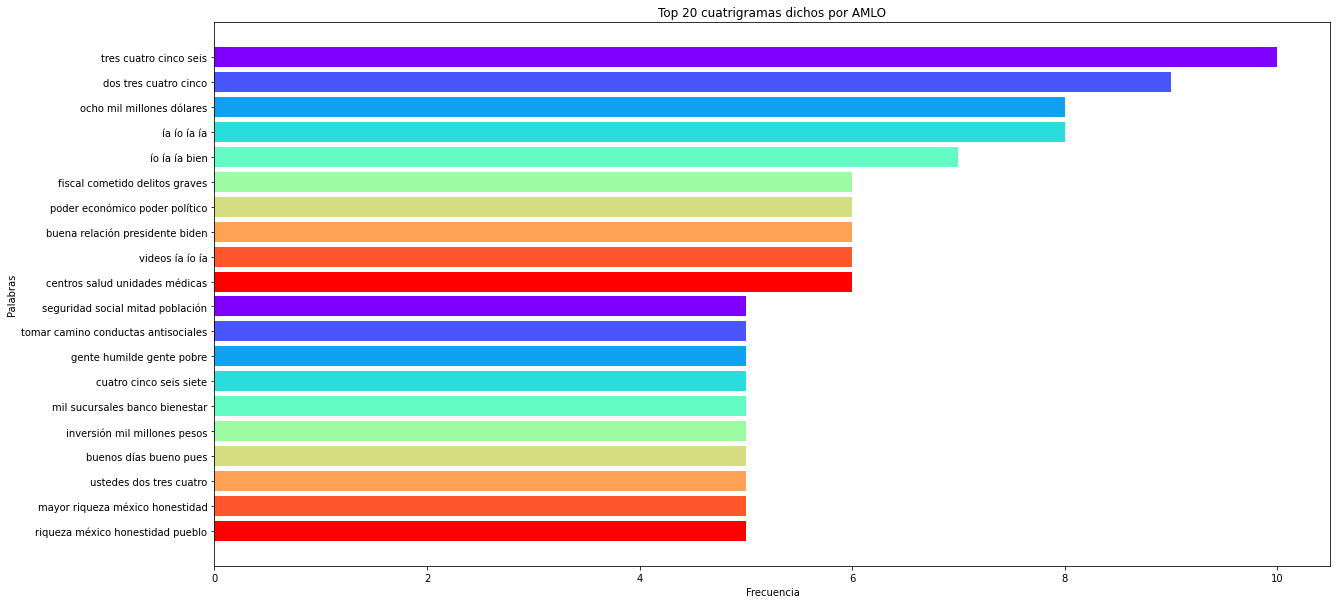

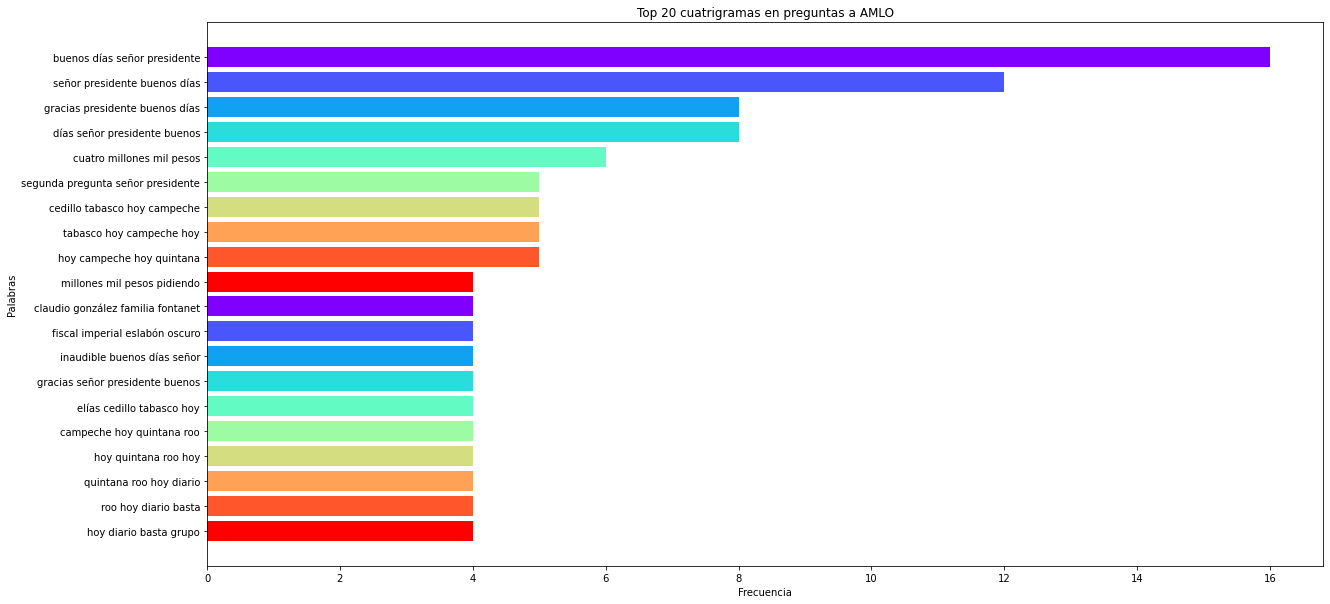

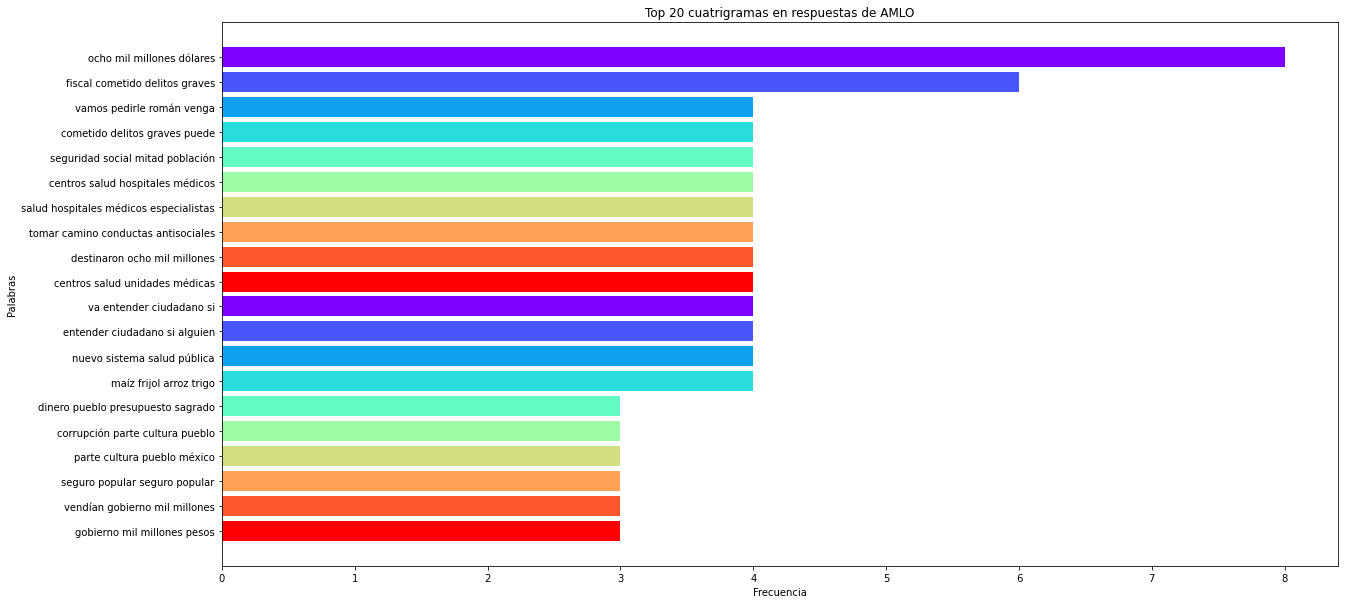

In [14]:
dialogos_cuatri=list(ngrams(dialogos_texto.split(),4))
dialogos_cuatri=[cuatrigrama[0] +" " +cuatrigrama[1]+" "+cuatrigrama[2]+" " +cuatrigrama[3] for cuatrigrama in dialogos_cuatri]
preguntas_cuatri=list(ngrams(preguntas_texto.split(),4))
preguntas_cuatri=[cuatrigrama[0]+" "+cuatrigrama[1]+" "+cuatrigrama[2]+" " +cuatrigrama[3] for cuatrigrama in preguntas_cuatri]
respuestas_cuatri=list(ngrams(respuestas_texto.split(),4))
respuestas_cuatri=[cuatrigrama[0]+" "+cuatrigrama[1]+" "+cuatrigrama[2]+" " +cuatrigrama[3] for cuatrigrama in respuestas_cuatri]
palabras_top(dialogos_cuatri,"cuatrigramas dichos por AMLO")
palabras_top(preguntas_cuatri,"cuatrigramas en preguntas a AMLO")
palabras_top(respuestas_cuatri,"cuatrigramas en respuestas de AMLO")

Observtions: The president counts a lot, takl about money, his relationship with USA's president, values, sanitary system, the fiscal and inequality. Questions are about money and states from the south. Whereas answers are about a fiscal's crime, sanitary system, corruption and taxes.

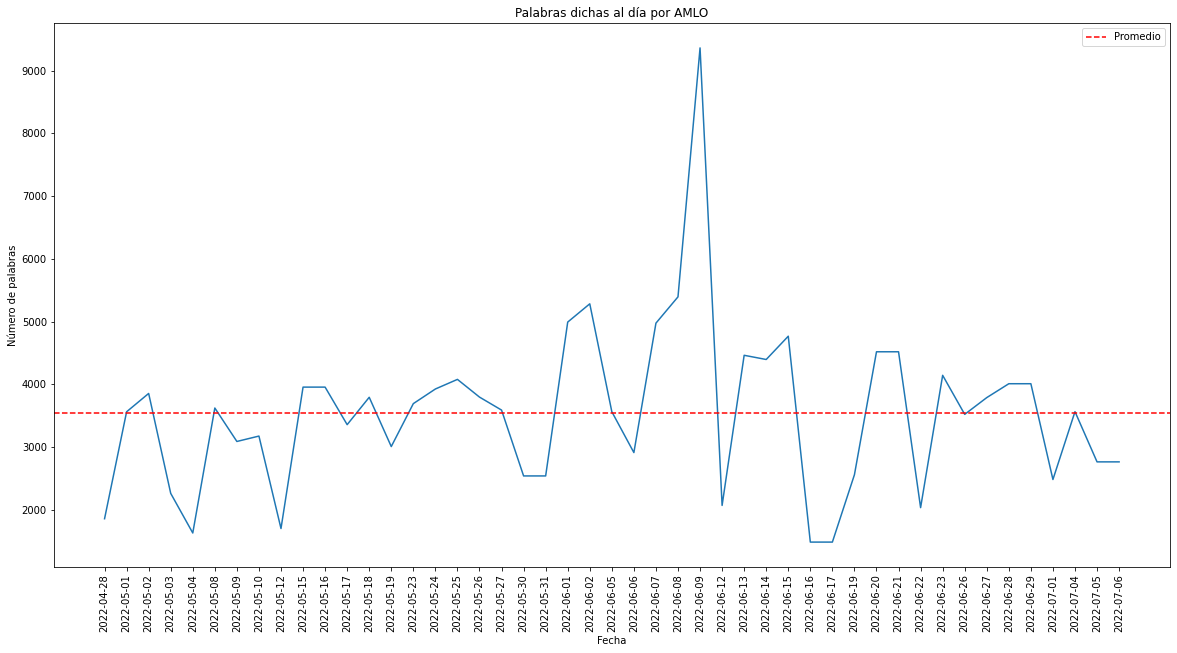

<Figure size 144x144 with 0 Axes>

In [15]:
df_dialogo=df_dialogos.copy()
pv_dia=pd.pivot_table(df_dialogo,index="Fecha",values="Dialogo",aggfunc=" ".join)
pv_dia["Dialogo"] = pv_dia["Dialogo"].apply(lambda x: [x.split(" ")])
pv_dia["Count"]=pv_dia["Dialogo"].apply(lambda x: len(x[0]))
sns.lineplot(data=pv_dia,x="Fecha",y="Count")
plt.ylabel("Número de palabras")
plt.title("Palabras dichas al día por AMLO")
plt.xticks(rotation=90)
plt.axhline(pv_dia.Count.mean(),color="r",linestyle="--",label="Promedio")
plt.legend()
plt.figure(figsize=(2,2))
plt.show()

Observations: AMLO says around 3500 words per day but almost every 4 days he talks 1000 words or less, the june 12th seems to had been an important day.